# Using Jupyter Notebooks
:label:`sec_jupyter`


This section describes how to edit and run the code
in each section of this book
using the Jupyter Notebook. Make sure you have
installed Jupyter and downloaded the
code as described in
:ref:`chap_installation`.
If you want to know more about Jupyter see the excellent tutorial in
their [documentation](https://jupyter.readthedocs.io/en/latest/).


## Editing and Running the Code Locally

Suppose that the local path of the book's code is `xx/yy/d2l-en/`. Use the shell to change the directory to this path (`cd xx/yy/d2l-en`) and run the command `jupyter notebook`. If your browser does not do this automatically, open http://localhost:8888 and you will see the interface of Jupyter and all the folders containing the code of the book, as shown in :numref:`fig_jupyter00`.

![The folders containing the code of this book.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter00.png?raw=1)
:width:`600px`
:label:`fig_jupyter00`


You can access the notebook files by clicking on the folder displayed on the webpage.
They usually have the suffix ".ipynb".
For the sake of brevity, we create a temporary "test.ipynb" file.
The content displayed after you click it is
shown in :numref:`fig_jupyter01`.
This notebook includes a markdown cell and a code cell. The content in the markdown cell includes "This Is a Title" and "This is text.".
The code cell contains two lines of Python code.

![Markdown and code cells in the "text.ipynb" file.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter01.png?raw=1)
:width:`600px`
:label:`fig_jupyter01`


Double click on the markdown cell to enter edit mode.
Add a new text string "Hello world." at the end of the cell, as shown in :numref:`fig_jupyter02`.

![Edit the markdown cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter02.png?raw=1)
:width:`600px`
:label:`fig_jupyter02`


As demonstrated in :numref:`fig_jupyter03`,
click "Cell" $\rightarrow$ "Run Cells" in the menu bar to run the edited cell.

![Run the cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter03.png?raw=1)
:width:`600px`
:label:`fig_jupyter03`

After running, the markdown cell is shown in :numref:`fig_jupyter04`.

![The markdown cell after running.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter04.png?raw=1)
:width:`600px`
:label:`fig_jupyter04`


Next, click on the code cell. Multiply the elements by 2 after the last line of code, as shown in :numref:`fig_jupyter05`.

![Edit the code cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter05.png?raw=1)
:width:`600px`
:label:`fig_jupyter05`


You can also run the cell with a shortcut ("Ctrl + Enter" by default) and obtain the output result from :numref:`fig_jupyter06`.

![Run the code cell to obtain the output.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter06.png?raw=1)
:width:`600px`
:label:`fig_jupyter06`


When a notebook contains more cells, we can click "Kernel" $\rightarrow$ "Restart & Run All" in the menu bar to run all the cells in the entire notebook. By clicking "Help" $\rightarrow$ "Edit Keyboard Shortcuts" in the menu bar, you can edit the shortcuts according to your preferences.

## Advanced Options

Beyond local editing two things are quite important: editing the notebooks in the markdown format and running Jupyter remotely.
The latter matters when we want to run the code on a faster server.
The former matters since Jupyter's native ipynb format stores a lot of auxiliary data that is
irrelevant to the content,
mostly related to how and where the code is run.
This is confusing for Git, making
reviewing contributions very difficult.
Fortunately there is an alternative---native editing in the markdown format.

### Markdown Files in Jupyter

If you wish to contribute to the content of this book, you need to modify the
source file (md file, not ipynb file) on GitHub.
Using the notedown plugin we
can modify notebooks in the md format directly in Jupyter.


First, install the notedown plugin, run the Jupyter Notebook, and load the plugin:

```
pip install d2l-notedown  # You may need to uninstall the original notedown.
jupyter notebook --NotebookApp.contents_manager_class='notedown.NotedownContentsManager'
```

You may also turn on the notedown plugin by default whenever you run the Jupyter Notebook.
First, generate a Jupyter Notebook configuration file (if it has already been generated, you can skip this step).

```
jupyter notebook --generate-config
```

Then, add the following line to the end of the Jupyter Notebook configuration file (for Linux or macOS, usually in the path `~/.jupyter/jupyter_notebook_config.py`):

```
c.NotebookApp.contents_manager_class = 'notedown.NotedownContentsManager'
```

After that, you only need to run the `jupyter notebook` command to turn on the notedown plugin by default.

### Running Jupyter Notebooks on a Remote Server

Sometimes, you may want to run Jupyter notebooks on a remote server and access it through a browser on your local computer. If Linux or macOS is installed on your local machine (Windows can also support this function through third-party software such as PuTTY), you can use port forwarding:

```
ssh myserver -L 8888:localhost:8888
```

The above string `myserver` is the address of the remote server.
Then we can use http://localhost:8888 to access the remote server `myserver` that runs Jupyter notebooks. We will detail on how to run Jupyter notebooks on AWS instances
later in this appendix.

### Timing

We can use the `ExecuteTime` plugin to time the execution of each code cell in Jupyter notebooks.
Use the following commands to install the plugin:

```
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable execute_time/ExecuteTime
```

## Summary

* Using the Jupyter Notebook tool, we can edit, run, and contribute to each section of the book.
* We can run Jupyter notebooks on remote servers using port forwarding.


## Exercises

1. Edit and run the code in this book with the Jupyter Notebook on your local machine.
1. Edit and run the code in this book with the Jupyter Notebook *remotely* via port forwarding.
1. Compare the running time of the operations $\mathbf{A}^\top \mathbf{B}$ and $\mathbf{A} \mathbf{B}$ for two square matrices in $\mathbb{R}^{1024 \times 1024}$. Which one is faster?


[Discussions](https://discuss.d2l.ai/t/421)


In [1]:
from google.colab import files
uploaded = files.upload()


Saving amblyopia_detection.ipynb to amblyopia_detection.ipynb


In [2]:
!pip install tensorflow numpy pandas matplotlib opencv-python scikit-learn

In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [5]:
import os
import cv2
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split

# Define image size
IMG_SIZE = (128, 128)

# Create an "images" directory in Colab
image_folder = "/content/images"
os.makedirs(image_folder, exist_ok=True)

# Function to upload images manually
def upload_images():
    uploaded = files.upload()  # Opens file uploader
    for filename in uploaded.keys():
        file_path = os.path.join(image_folder, filename)
        with open(file_path, "wb") as f:
            f.write(uploaded[filename])

# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    labels = []  # Placeholder for labels
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, IMG_SIZE)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
            labels.append(0)  # Placeholder label
    return np.array(images), np.array(labels)

# Upload images manually
upload_images()

# Load images from dataset
X, y = load_images_from_folder(image_folder)

# Normalize images
X = X / 255.0

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset loaded and split successfully!")


Saving img22.jpg to img22.jpg
Saving img21.jpg to img21.jpg
Saving img20.jpg to img20.jpg
Saving img19.jpg to img19.jpg
Saving img18.jpg to img18.jpg
Saving img17.jpg to img17.jpg
Saving img16.jpg to img16.jpg
Saving img15.jpg to img15.jpg
Saving img14.jpg to img14.jpg
Saving img13.jpg to img13.jpg
Saving img12.jpg to img12.jpg
Saving img11.jpg to img11.jpg
Saving img10.jpg to img10.jpg
Saving img9.jpg to img9.jpg
Saving img8.jpg to img8.jpg
Saving img7.jpg to img7.jpg
Saving img6.jpg to img6.jpg
Saving img5.jpg to img5.jpg
Saving im5.jpg to im5.jpg
Saving img4.jpg to img4.jpg
Saving img3.jpg to img3.jpg
Saving img2.jpg to img2.jpg
Saving img1.jpg to img1.jpg
Dataset loaded and split successfully!


In [7]:
def preprocess_image(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Apply Histogram Equalization
    equalized = cv2.equalizeHist(gray)

    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(equalized, (3, 3), 0)

    # Apply Edge Detection (Canny)
    edges = cv2.Canny(blurred, 50, 150)

    # Convert back to 3-channel format
    processed_img = cv2.merge([edges, edges, edges])

    return processed_img

# Function to load and preprocess images from a folder
def load_images_from_folder(folder):
    images, labels = [], []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, IMG_SIZE)
            img = preprocess_image(img)  # Apply preprocessing
            images.append(img)
            labels.append(0)  # Placeholder label (change based on dataset)

    return np.array(images), np.array(labels)

# Load dataset
image_folder = "images"  # Modify based on your path
X, y = load_images_from_folder(image_folder)

# Normalize images
X = X / 255.0

# Reshape for CNN input
X = X.reshape(X.shape[0], 128, 128, 3)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from tensorflow.keras.optimizers import Adam

# CNN Model for Feature Extraction
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2,2)),

    # Second Convolutional Block
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # Third Convolutional Block
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # Flatten & Fully Connected Layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization to prevent overfitting
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Display Model Summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(X_train)

# Train the Model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=20)

# Save the model
model.save("ocular_cnn_model.h5")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2778 - loss: 0.7444 - val_accuracy: 1.0000 - val_loss: 9.5456e-05
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 1.0747e-07
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step - accuracy: 1.0000 - loss: 4.9479e-05 - val_accuracy: 1.0000 - val_loss: 1.5192e-10
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step - accuracy: 1.0000 - loss: 2.1352e-05 - val_accuracy: 1.0000 - val_loss: 2.2088e-13
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 1.4715e-09 - val_accuracy: 1.0000 - val_loss: 3.6304e-16
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step - accuracy: 1.0000 - loss: 1.3734e-10 - val_accuracy: 1.0000 - val_loss: 7.0649e-19
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step - accuracy: 1.0000 - loss: 6.2540e-13 - val_accuracy: 1.0000 - val_loss: 1.6875e-21
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 1.9495e-13 - 

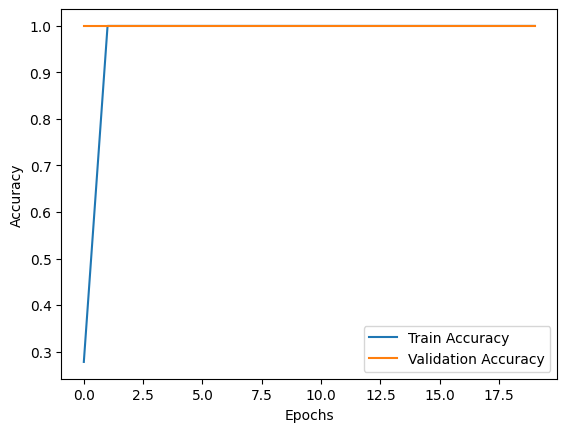

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 100.00%


In [13]:
# Plot Training Performance
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the Model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")


In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Define Image Size
IMG_SIZE = (128, 128)

# Function to Load and Preprocess Images
def load_images_from_folder(folder):
    images = []
    labels = []  # Placeholder for labels
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, IMG_SIZE)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
            labels.append(0)  # Placeholder label
    return np.array(images), np.array(labels)

# Create Image Directory in Colab
image_folder = "images"
os.makedirs(image_folder, exist_ok=True)

# Load Images
X, y = load_images_from_folder(image_folder)

# Normalize Images
X = X / 255.0

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Apply Augmentation
datagen.fit(X_train)


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Display Model Summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the Model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=10)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2778 - loss: 0.7312 - val_accuracy: 1.0000 - val_loss: 0.0594
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step - accuracy: 1.0000 - loss: 0.0635 - val_accuracy: 1.0000 - val_loss: 7.0993e-04
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 2.1885e-06
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step - accuracy: 1.0000 - loss: 2.2108e-04 - val_accuracy: 1.0000 - val_loss: 2.1228e-09
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step - accuracy: 1.0000 - loss: 2.0752e-10 - val_accuracy: 1.0000 - val_loss: 9.3955e-13
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step - accuracy: 1.0000 - loss: 5.8187e-07 - val_accuracy: 1.0000 - val_loss: 2.4279e-16
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 4.2815e-16 - val_accuracy: 1.0000 - val_loss: 4.4842e-20
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step - accuracy: 1.0000 - loss: 2.3652e-15

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to Visualize Feature Maps
def visualize_feature_maps(model, image):
    image = image.reshape(1, 128, 128, 3)  # Ensure correct shape

    # Forward pass to initialize the model with input
    _ = model.predict(image)

    # Extract convolutional layer outputs
    layer_outputs = [layer.output for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

    # Compute activations
    activations = activation_model.predict(image)

    layer_names = [layer.name for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]

    for layer_name, activation in zip(layer_names, activations):
        plt.figure(figsize=(10, 10))
        for i in range(min(activation.shape[-1], 8)):  # Display up to 8 feature maps
            plt.subplot(1, 8, i+1)
            plt.imshow(activation[0, :, :, i], cmap='viridis')
            plt.axis('off')
        plt.suptitle(f"Feature Maps from Layer: {layer_name}")
        plt.show()

# Select an image to visualize
test_image = X_test[0]
visualize_feature_maps(model, test_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


AttributeError: The layer sequential_2 has never been called and thus has no defined input.

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# **Build the model explicitly**
model.build(input_shape=(None, 128, 128, 3))


In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Function to visualize feature maps
def visualize_feature_maps(model, image):
    image = image.reshape(1, 128, 128, 3)  # Ensure correct shape

    # Forward pass to initialize the model with input
    _ = model.predict(image)

    # Extract convolutional layer outputs
    layer_outputs = [layer.output for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

    # Compute activations
    activations = activation_model.predict(image)

    layer_names = [layer.name for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]

    for layer_name, activation in zip(layer_names, activations):
        plt.figure(figsize=(10, 10))
        for i in range(min(activation.shape[-1], 8)):  # Display up to 8 feature maps
            plt.subplot(1, 8, i+1)
            plt.imshow(activation[0, :, :, i], cmap='viridis')
            plt.axis('off')
        plt.suptitle(f"Feature Maps from Layer: {layer_name}")
        plt.show()

# Select an image from X_test
test_image = X_test[0]
visualize_feature_maps(model, test_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


AttributeError: The layer sequential_3 has never been called and thus has no defined input.

In [21]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# **Fix: Ensure Model is Built**
model.build(input_shape=(None, 128, 128, 3))
model.summary()  # Check if the model is built correctly



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
import numpy as np

# Dummy forward pass to initialize model
dummy_input = np.random.rand(1, 128, 128, 3)
_ = model.predict(dummy_input)  # This ensures the model is "called" at least once


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
